#Irish Housing Market Analysis

This notebook provides and analysis of the irish housing market from 2010 to 2015. The data is available here:
https://www.propertypriceregister.ie/website/npsra/pprweb.nsf/PPRDownloads?OpenForm&File=PPR-2015.csv&County=ALL&Year=2015&Month=ALL


The data contains random unicode characters which I ascertained cannot be cleaned through python via some helpful conversations on stackexchange http://stackoverflow.com/questions/30937395/unknown-character-issue-%EF%BF%BD. To which the most useful reply was http://devopsreactions.tumblr.com/post/42346031350/random-unicode-character-in-a-column-name-cannot

This resulted in me having to do some manual cleaning of the data :(

In [1]:
import pandas as pd
import zipfile
import numpy
import matplotlib.pyplot as pl
import os
import string

%matplotlib inline
os.getcwd()

'C:\\Users\\marcus.ohanlon'

###Step 1
###Read in all my data

In [2]:
csvs = range (2010, 2016)
pieces = pd.DataFrame()
df = pd.DataFrame()
for j in csvs:
    path = 'PPR-%d.CSV' % j
    with open(path) as data_file:
        data = pd.read_csv(data_file,encoding='cp1252',parse_dates=['Date of Sale (dd/mm/yyyy)'])
        df = df.append(data)
        
df.head()

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,2010-01-01,"5 Braemor Drive, Churchtown, Co.Dublin",NaN,Dublin,343000,No,No,Second-Hand Dwelling house /Apartment,NaN
1,2010-03-01,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,2010-04-01,"1 Meadow Avenue, Dundrum, Dublin 14",NaN,Dublin,438500,No,No,Second-Hand Dwelling house /Apartment,NaN
3,2010-04-01,"1 The Haven, Mornington",NaN,Meath,400000,No,No,Second-Hand Dwelling house /Apartment,NaN
4,2010-04-01,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000,No,No,Second-Hand Dwelling house /Apartment,NaN


###Step 2
Create some useful columns using the date column

In [3]:
df.rename(columns=lambda x: '{}'.format('_'.join([y.strip(string.punctuation) for y in x.lower().split()])), inplace=True)  
df['year']=df['date_of_sale_dd/mm/yyyy'].apply(
            lambda x: x.year)
df['month']=df['date_of_sale_dd/mm/yyyy'].apply(
            lambda x: x.strftime("%B"))
df['day'] = df['date_of_sale_dd/mm/yyyy'].map(lambda x: x.strftime("%A"))
df['count'] = 1
df.tail()

,date_of_sale_dd/mm/yyyy,address,postal_code,county,price,not_full_market_price,vat_exclusive,description_of_property,property_size_description,year,month,day,count
17443,2015-12-06,"KNOCKBRACK, ABBEYFEALE, LIMERICK",NaN,Limerick,46000,No,No,Second-Hand Dwelling house /Apartment,NaN,2015,December,Sunday,1
17444,2015-12-06,"NO8, TOGHER CRESENT, URLINGFORD",NaN,Kilkenny,175000,No,No,Second-Hand Dwelling house /Apartment,NaN,2015,December,Sunday,1
17445,2015-12-06,"RAHEEN, HEADFORD, KILLARNEY",NaN,Kerry,48500,No,No,Second-Hand Dwelling house /Apartment,NaN,2015,December,Sunday,1
17446,2015-12-06,"SHANAGHY HEIGHTS, BALLINA, MAYO",NaN,Mayo,150000,No,No,Second-Hand Dwelling house /Apartment,NaN,2015,December,Sunday,1
17447,2015-12-06,"WESTWOOD, CLOUGHLEAGH, MANOR KILBRIDE",NaN,Wicklow,400000,No,No,Second-Hand Dwelling house /Apartment,NaN,2015,December,Sunday,1


###Step 3
Validate all data types are as expected

In [4]:
df.dtypes

date_of_sale_dd/mm/yyyy      datetime64[ns]
address                              object
postal_code                          object
county                               object
price                               float64
not_full_market_price                object
vat_exclusive                        object
description_of_property              object
property_size_description            object
year                                  int64
month                                object
day                                  object
count                                 int64
dtype: object

###Volume Analysis

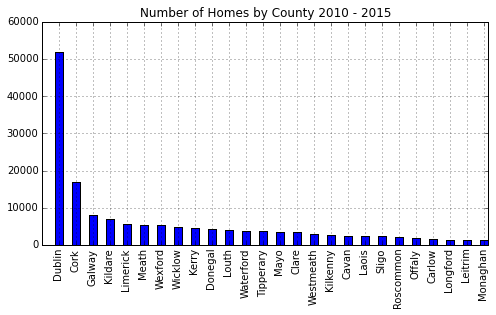

In [5]:
df.county.value_counts().plot(kind='bar', figsize=(8,4),title='Number of Homes by County 2010 - 2015')

As you would expect Dublin is has sold the largest amount of homes in the last 5 years

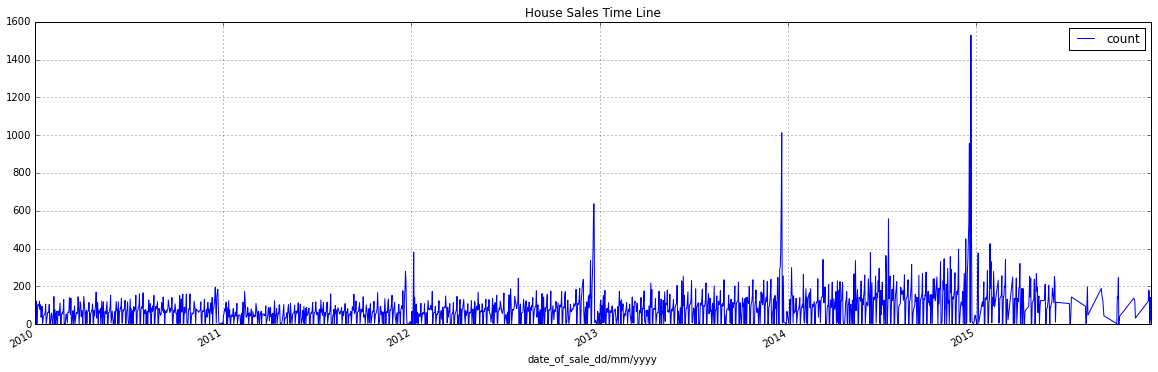

In [6]:
timeseries = df[['date_of_sale_dd/mm/yyyy','count']].groupby(['date_of_sale_dd/mm/yyyy']).sum()
timeseries.plot( figsize=(20, 6),title='House Sales Time Line')

Oddly there seems to be a noticeable spike 4 times in the past five years, lets identify these


In [7]:
time = timeseries.sort('count', ascending=False)['count'][:10]
time

date_of_sale_dd/mm/yyyy
2014-12-22                 1529
2013-12-20                 1013
2014-12-19                  956
2012-12-21                  637
2012-12-20                  636
2013-12-19                  626
2014-07-15                  558
2014-12-18                  541
2014-12-23                  533
2014-12-12                  451
Name: count, dtype: int64

The all seem to be around the end of the year so I believe that this is a reporting issue where by they are tieing up lose ends at the end of the year.

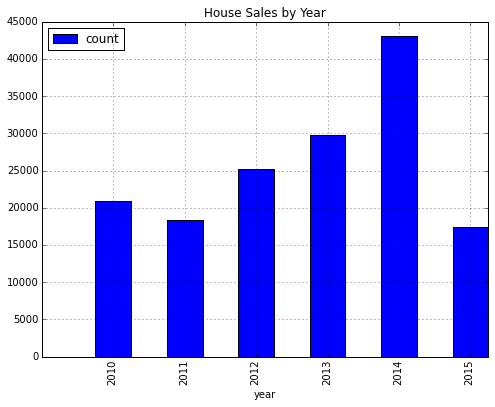

In [8]:
timeseries = df[['year','count']].groupby(['year']).sum()
timeseries.plot(kind = 'bar', figsize=(8, 6),title='House Sales by Year')

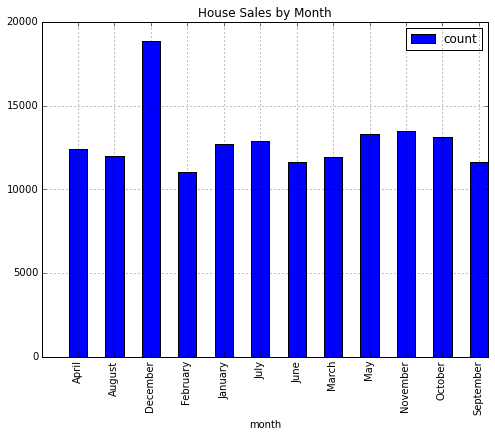

In [9]:
timeseries = df[['month','count']].groupby(['month']).sum()
timeseries.plot(kind = 'bar', figsize=(8, 6),title='House Sales by Month')

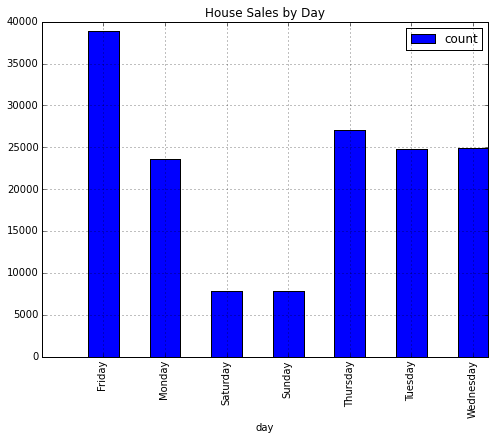

In [10]:
timeseries = df[['day','count']].groupby(['day']).sum()
timeseries.plot(kind = 'bar', figsize=(8, 6),title='House Sales by Day')

###Value Analysis

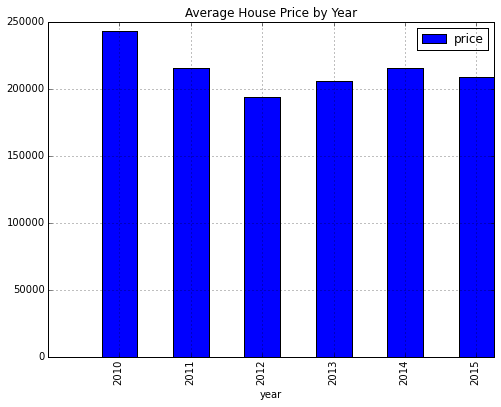

In [11]:
timeseries = df[['year','price']].groupby(['year']).mean()
timeseries.plot(kind = 'bar', figsize=(8, 6),title='Average House Price by Year')

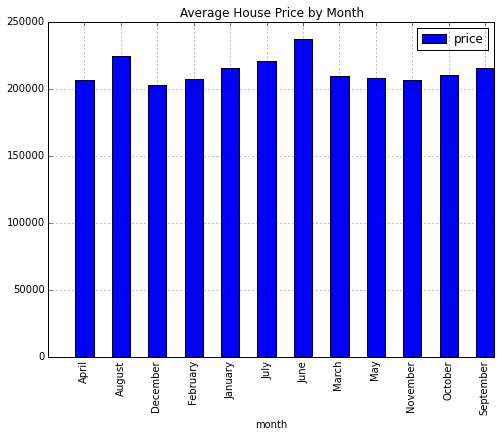

In [12]:
timeseries = df[['month','price']].groupby(['month']).mean()
timeseries.plot(kind = 'bar', figsize=(8, 6),title='Average House Price by Month')

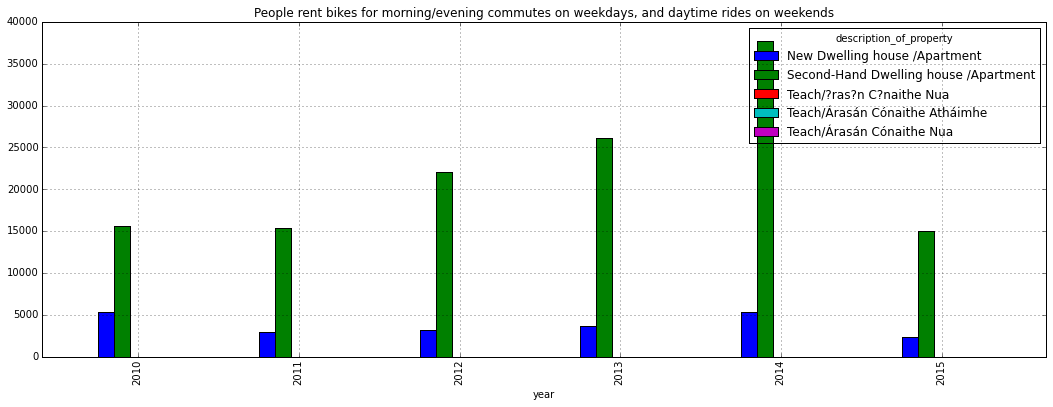

In [17]:
day_hour_events = df[['year','description_of_property','count']].groupby(['year','description_of_property']).sum().reset_index()
t = day_hour_events.pivot(index='year', columns='description_of_property', values='count').fillna(method='ffill')
t.interpolate().plot(kind='bar',title='Type of homes sold', figsize=(18,6))

In [18]:
day_hour_events

,year,description_of_property,count
0,2010,New Dwelling house /Apartment,5292
1,2010,Second-Hand Dwelling house /Apartment,15622
2,2010,Teach/Árasán Cónaithe Atháimhe,3
3,2010,Teach/Árasán Cónaithe Nua,1
4,2011,New Dwelling house /Apartment,2940
5,2011,Second-Hand Dwelling house /Apartment,15406
6,2011,Teach/Árasán Cónaithe Atháimhe,3
7,2012,New Dwelling house /Apartment,3155
8,2012,Second-Hand Dwelling house /Apartment,22073
9,2012,Teach/?ras?n C?naithe Nua,1


#Isolate Dublin Housing Sector

In [22]:
df_f = df[df['county'] == 'Dublin']

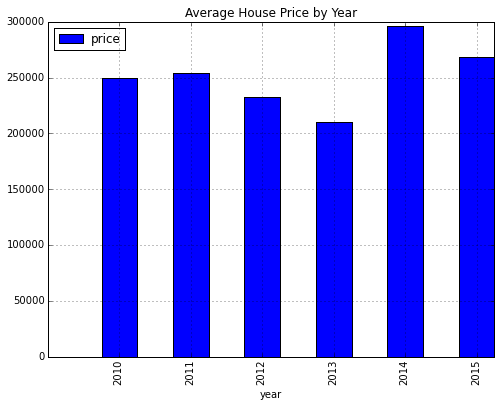

In [30]:
df1 = df_f[df_f['description_of_property']=='New Dwelling house /Apartment']
timeseries = df1[['year','price']].groupby(['year']).mean()
timeseries.plot(kind = 'bar', figsize=(8, 6),title='Average House Price by Year')

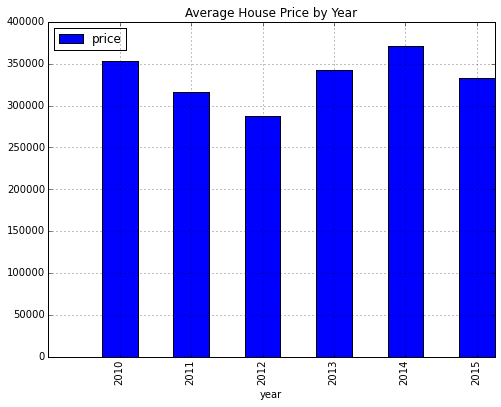

In [29]:
df2 = df_f[df_f['description_of_property']=='Second-Hand Dwelling house /Apartment']
timeseries = df2[['year','price']].groupby(['year']).mean()
timeseries.plot(kind = 'bar', figsize=(8, 6),title='Average House Price by Year')